In [2]:

from data_preprocessing.dataloader import loading_data
import argparse

parser = argparse.ArgumentParser()

parser.add_argument('--padding', type=str, 
                    default='mean', help='choose one of them : no, max, mean')
parser.add_argument('--timespan', type=int, 
                    default=10000, help='choose of the number of timespan between data points(1000 = 1sec, 60000 = 1min)')
parser.add_argument('--min_seq', type=int, 
                    default=10, help='choose of the minimum number of data points in a example')
parser.add_argument('--min_samples', type=int, default=20, 
                    help='choose of the minimum number of samples in each label')
parser.add_argument('--selected_dataset', default='lapras', type=str,
                    help='Dataset of choice: lapras, casas, opportunity, aras_a, aras_b')
parser.add_argument('--aug_method', type=str, default='AddNoise', help='choose the data augmentation method')
parser.add_argument('--aug_wise', type=str, default='Temporal', help='choose the data augmentation wise')

parser.add_argument('--test_ratio', type=float, default=0.3, help='choose the number of test ratio')

args = parser.parse_args(args=[])
data_type = args.selected_dataset

# DOO-RE
num_classes_DR, datalist_DR, labellist_DR = loading_data('lapras', args)
print(datalist_DR.shape)

# CASAS
num_classes_CS, datalist_CS, labellist_CS = loading_data('casas', args)
print(datalist_CS.shape)

# Opportunity
num_classes_OP, datalist_OP, labellist_OP = loading_data('opportunity', args)
print(datalist_OP.shape)

# ARAS_A
num_classes_AA, datalist_AA, labellist_AA = loading_data('aras_a', args)
print(datalist_AA.shape)

# ARAS_B
num_classes_AB, datalist_AB, labellist_AB = loading_data('aras_b', args)
print(datalist_AB.shape)

Loading Lapras Dataset--------------------------------------
['Seat Occupy', 'Sound', 'Brightness', 'Light', 'Existence', 'Projector', 'Presentation']
Loading Lapras Dataset Finished--------------------------------------
types_label : [1, 2, 3, 4]
count_label : [119, 52, 40, 129]
sum of # episodes: 340
original label: [1, 2, 3, 4] 
changed label: [1, 2, 3, 4]
Augmentation Starting-------------------
types_label : [1, 2, 3, 4]
count_label : [119, 52, 40, 129]
sum of # episodes: 340
The amount of augmented data: [10, 77, 89, 0]
Before padding-----------------
types_label : [1, 2, 3, 4]
count_label : [119, 52, 40, 129]
sum of # episodes: 340
mean padding (length): 527
After padding-----------------
types_label : [0, 1, 2, 3]
count_label : [119, 52, 40, 129]
sum of # episodes: 340
torch.Size([340, 527, 7])
Loading CASAS Dataset--------------------------------------
data/CASAS/P01.txt
data/CASAS/P02.txt
data/CASAS/P03.txt
data/CASAS/P04.txt
data/CASAS/P05.txt
data/CASAS/P06.txt
data/CASAS/P

torch.Size([340, 527, 7])
[1, 2, 3, 4]


/home/juice/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/juice/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


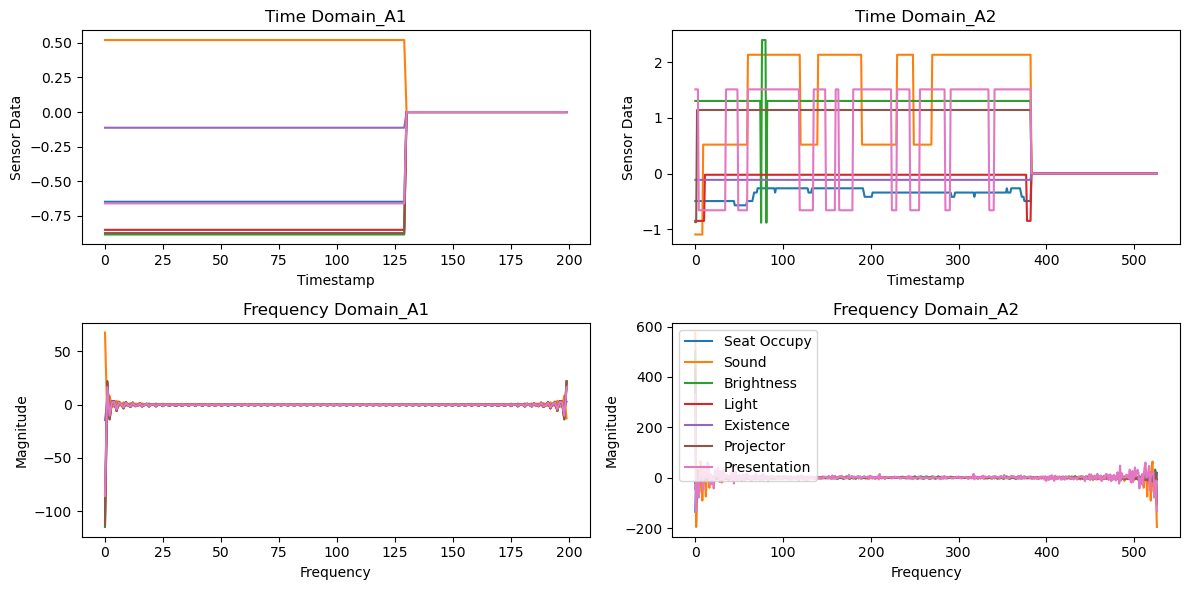

In [4]:
# Visualization for DOO-RE
import numpy as np
import matplotlib.pyplot as plt
from tsaug import *

# [119, 52, 40, 129]
print(datalist_DR.shape)
print(num_classes_DR)

# 입력 데이터 생성
input_data_1 = datalist_DR[70][:200 , : ].cpu().numpy()  # Activity 1
input_data_2 = datalist_DR[317].cpu().numpy()  # Activity 2

# 시간 도메인 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(input_data_1)
plt.title("Time Domain_A1")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")

plt.subplot(2, 2, 2)
plt.plot(input_data_2)
plt.title("Time Domain_A2")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")



# 주파수 도메인 데이터 시각화
freq_data_1 = np.fft.fft((input_data_1[:200 , : ]), axis=0)
freq_data_2 = np.fft.fft((input_data_2), axis=0)

plt.subplot(2, 2, 3)
plt.plot(freq_data_1)
plt.title("Frequency Domain_A1")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
plt.plot(freq_data_2)
plt.title("Frequency Domain_A2")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.legend(['Seat Occupy', 'Sound', 'Brightness', 'Light', 'Existence', 'Projector', 'Presentation']) 
plt.tight_layout()
plt.show()


/home/juice/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/juice/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


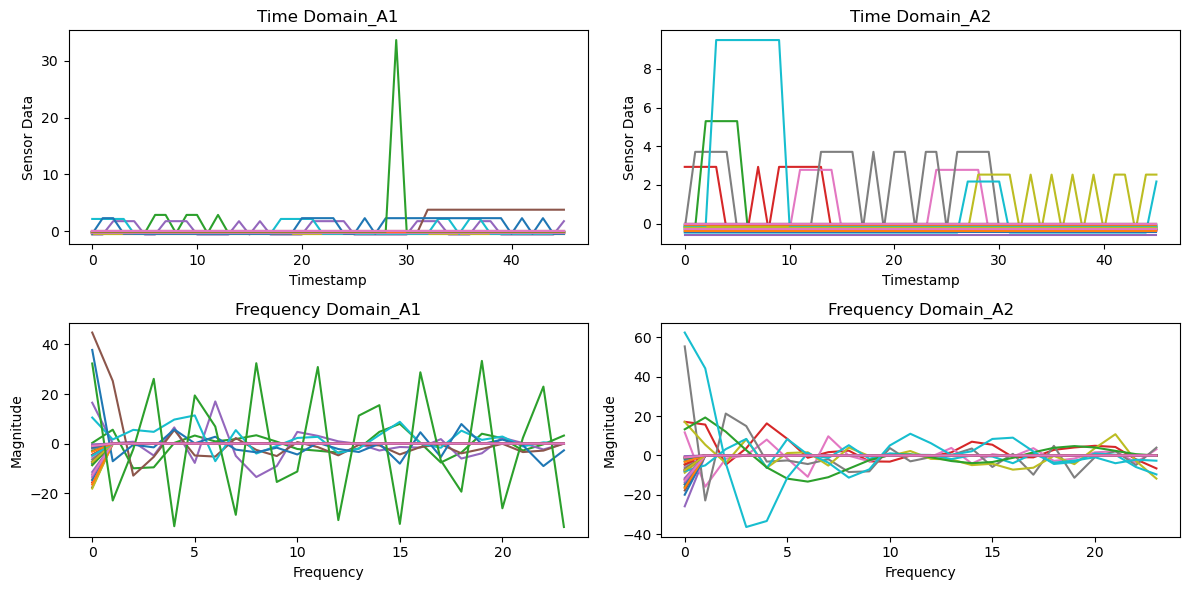

In [6]:
# Visualization for CASAS
import numpy as np
import matplotlib.pyplot as plt
from tsaug import *


# 입력 데이터 생성
input_data_1 = datalist_CS[30][:200 , : ].cpu().numpy()  # Activity 1
input_data_2 = datalist_CS[317].cpu().numpy()  # Activity 2

# 시간 도메인 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(input_data_1)
plt.title("Time Domain_A1")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")

plt.subplot(2, 2, 2)
plt.plot(input_data_2)
plt.title("Time Domain_A2")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")



# 주파수 도메인 데이터 시각화
freq_data_1 = np.fft.rfft((input_data_1[:200 , : ]), axis=0)
freq_data_2 = np.fft.rfft((input_data_2), axis=0)

plt.subplot(2, 2, 3)
plt.plot(freq_data_1)
plt.title("Frequency Domain_A1")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
plt.plot(freq_data_2)
plt.title("Frequency Domain_A2")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()


/home/juice/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/juice/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


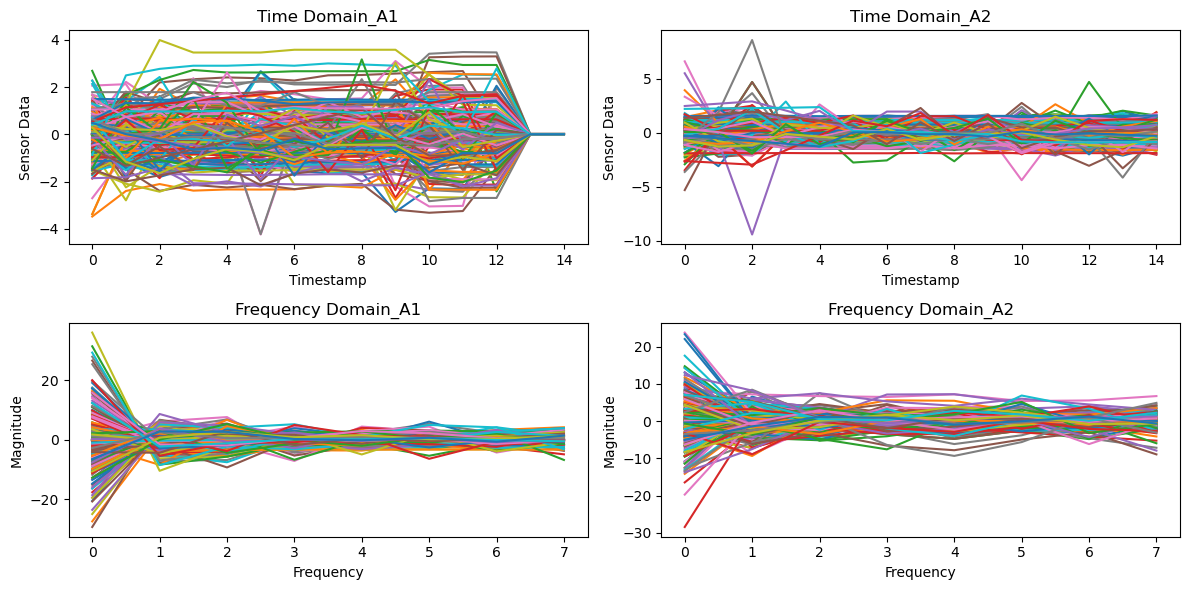

In [8]:
# Visualization for Opportunity
import numpy as np
import matplotlib.pyplot as plt
from tsaug import *


# 입력 데이터 생성
input_data_1 = datalist_OP[30][:200 , : ].cpu().numpy()  # Activity 1
input_data_2 = datalist_OP[20].cpu().numpy()  # Activity 2

# 시간 도메인 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(input_data_1)
plt.title("Time Domain_A1")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")

plt.subplot(2, 2, 2)
plt.plot(input_data_2)
plt.title("Time Domain_A2")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")



# 주파수 도메인 데이터 시각화
freq_data_1 = np.fft.rfft((input_data_1[:200 , : ]), axis=0)
freq_data_2 = np.fft.rfft((input_data_2), axis=0)

plt.subplot(2, 2, 3)
plt.plot(freq_data_1)
plt.title("Frequency Domain_A1")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
plt.plot(freq_data_2)
plt.title("Frequency Domain_A2")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

/home/juice/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/juice/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


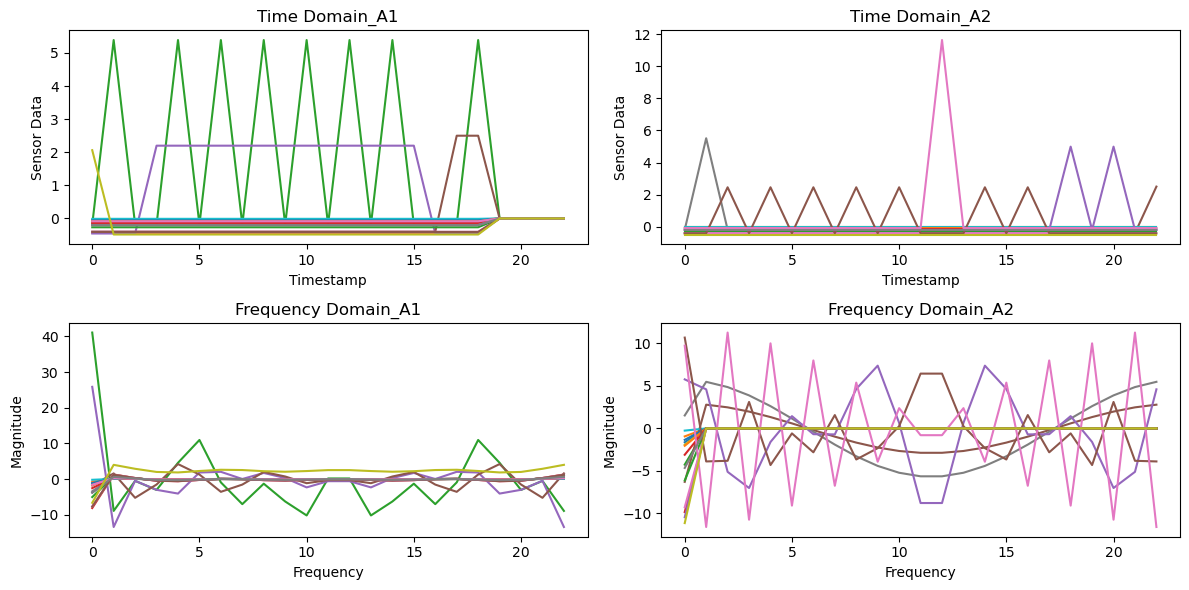

In [23]:
# Visualization for ARAS_A
import numpy as np
import matplotlib.pyplot as plt
from tsaug import *


# 입력 데이터 생성
input_data_1 = datalist_AA[30][:200 , : ].cpu().numpy()  # Activity 1
input_data_2 = datalist_AA[70].cpu().numpy()  # Activity 2

# 시간 도메인 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(input_data_1)
plt.title("Time Domain_A1")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")

plt.subplot(2, 2, 2)
plt.plot(input_data_2)
plt.title("Time Domain_A2")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")



# 주파수 도메인 데이터 시각화
freq_data_1 = np.fft.fft((input_data_1[:200 , : ]), axis=0)
freq_data_2 = np.fft.fft((input_data_2), axis=0)

plt.subplot(2, 2, 3)
plt.plot(freq_data_1)
plt.title("Frequency Domain_A1")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
plt.plot(freq_data_2)
plt.title("Frequency Domain_A2")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

/home/juice/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/juice/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


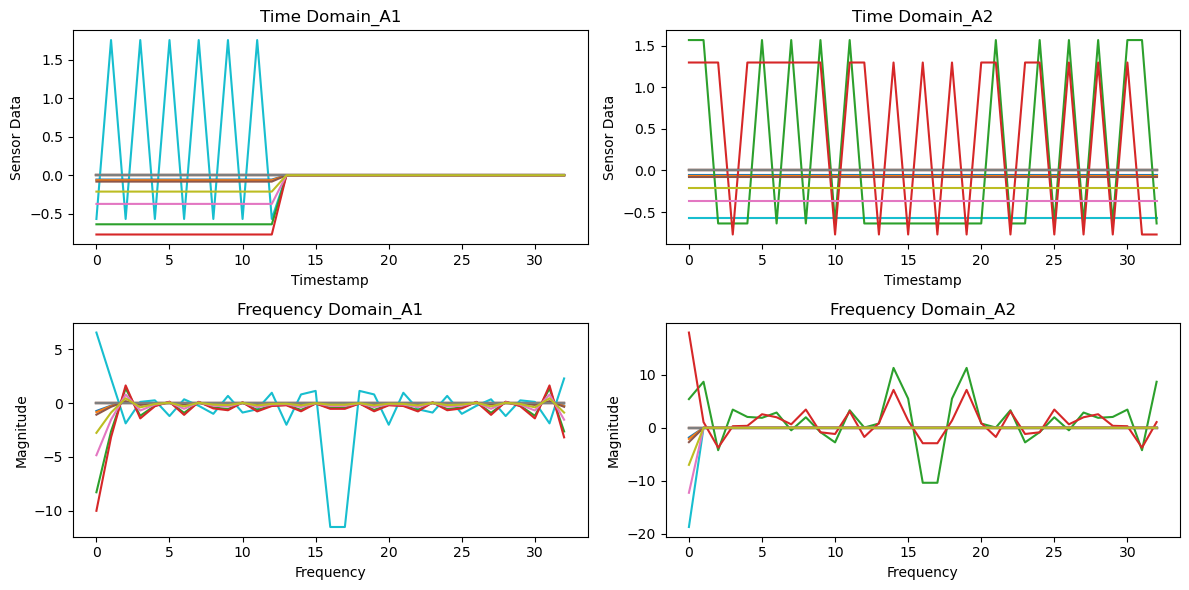

In [25]:
# Visualization for ARAS_B
import numpy as np
import matplotlib.pyplot as plt
from tsaug import *


# 입력 데이터 생성
input_data_1 = datalist_AB[30][:200 , : ].cpu().numpy()  # Activity 1
input_data_2 = datalist_AB[50].cpu().numpy()  # Activity 2

# 시간 도메인 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(input_data_1)
plt.title("Time Domain_A1")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")

plt.subplot(2, 2, 2)
plt.plot(input_data_2)
plt.title("Time Domain_A2")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")


# 주파수 도메인 데이터 시각화
freq_data_1 = np.fft.fft((input_data_1[:200 , : ]), axis=0)
freq_data_2 = np.fft.fft((input_data_2), axis=0)

plt.subplot(2, 2, 3)
plt.plot(freq_data_1)
plt.title("Frequency Domain_A1")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
plt.plot(freq_data_2)
plt.title("Frequency Domain_A2")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()